In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes_data = pd.read_csv("E:\classification project\health care diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
zero_to_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[zero_to_null] = diabetes_data[zero_to_null].replace(0, np.nan)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:

diabetes_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


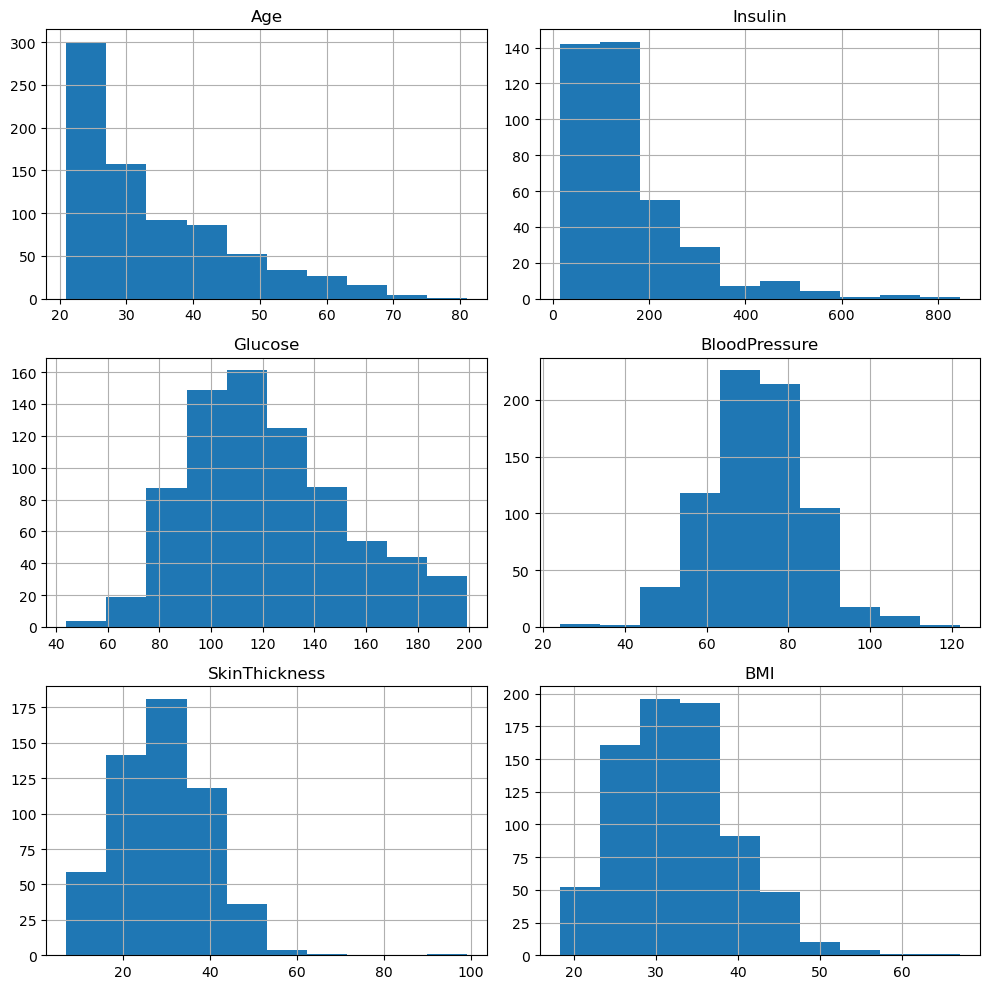

In [8]:
diabetes_data[[
    'Age', 'Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'
]].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [9]:
# Create a new column indicating the age group for each row based on the 'Age' column
bins = [20, 30, 40, 50, 60, float('inf')]
labels = ['21-30', '31-40', '41-50', '51-60', 'above 60']
diabetes_data['Age Group'] = pd.cut(diabetes_data['Age'],
                                    bins=bins,
                                    labels=labels,
                                    include_lowest=True)

# Group the data by age group and calculate the median insulin value for each group
insulin_median_by_age_group = diabetes_data.groupby(
    'Age Group')['Insulin'].median()

# Print the results
print(insulin_median_by_age_group)

Age Group
21-30       105.0
31-40       140.0
41-50       131.0
51-60       207.0
above 60    180.0
Name: Insulin, dtype: float64


In [10]:
# Define a dictionary with average insulin values based on age groups

insulin_values = {
    '21-30': 105,
    '31-40': 140,
    '41-50': 131,
    '51-60': 207,
    'above 60': 180
}

# Fill NaN values in the 'Insulin' column based on the age group
diabetes_data['Insulin'] = diabetes_data.apply(
    lambda x: insulin_values[x['Age Group']]
    if pd.isna(x['Insulin']) else x['Insulin'],
    axis=1)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age Group
0,6,148.0,72.0,35.0,131.0,33.6,0.627,50,1,41-50
1,1,85.0,66.0,29.0,140.0,26.6,0.351,31,0,31-40
2,8,183.0,64.0,NaN,140.0,23.3,0.672,32,1,31-40
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,21-30
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,31-40


In [11]:
fillna_mean = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
diabetes_data[fillna_mean] = diabetes_data[fillna_mean].fillna(
    diabetes_data[fillna_mean].mean())
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age Group                   0
dtype: int64

<AxesSubplot:>

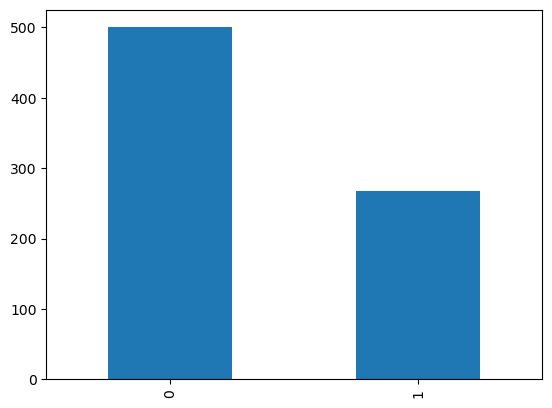

In [12]:
diabetes_data['Outcome'].value_counts().plot(kind='bar')

In [13]:
diabetes_data.to_excel('NIDDK_Updated Data.xlsx', sheet_name = 'NIDDK_Data')

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
data_X = diabetes_data.drop(['Outcome','Age Group'], axis=1)
data_y = diabetes_data['Outcome']

In [16]:
X_resampled, y_resampled = SMOTE(random_state=100).fit_resample(data_X, data_y)
print(X_resampled.shape, y_resampled.shape)

(1000, 8) (1000,)


<AxesSubplot:>

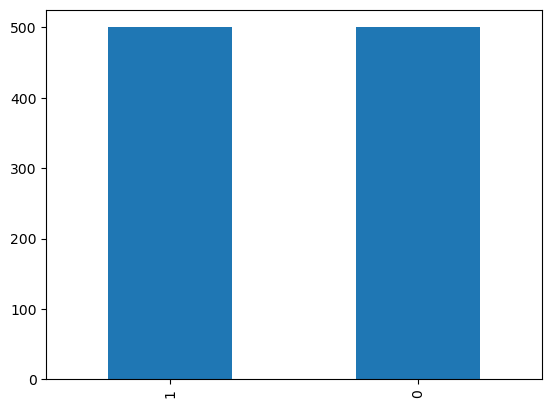

In [17]:
y_resampled.value_counts().plot(kind='bar')

In [18]:
data_resampled = pd.concat([X_resampled, y_resampled],axis=1)
data_resampled.shape

(1000, 9)

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

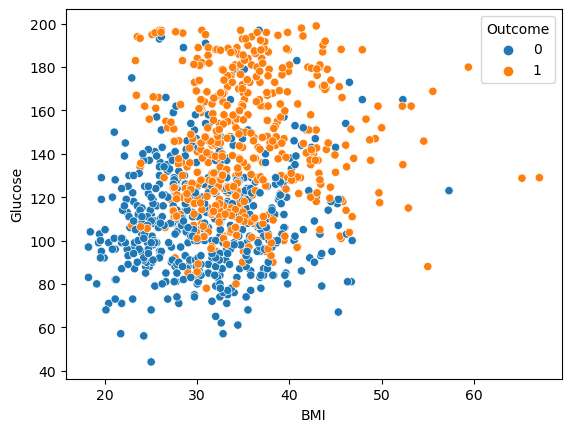

In [20]:
sns.scatterplot(x="BMI", y="Glucose", data=data_resampled, hue="Outcome")

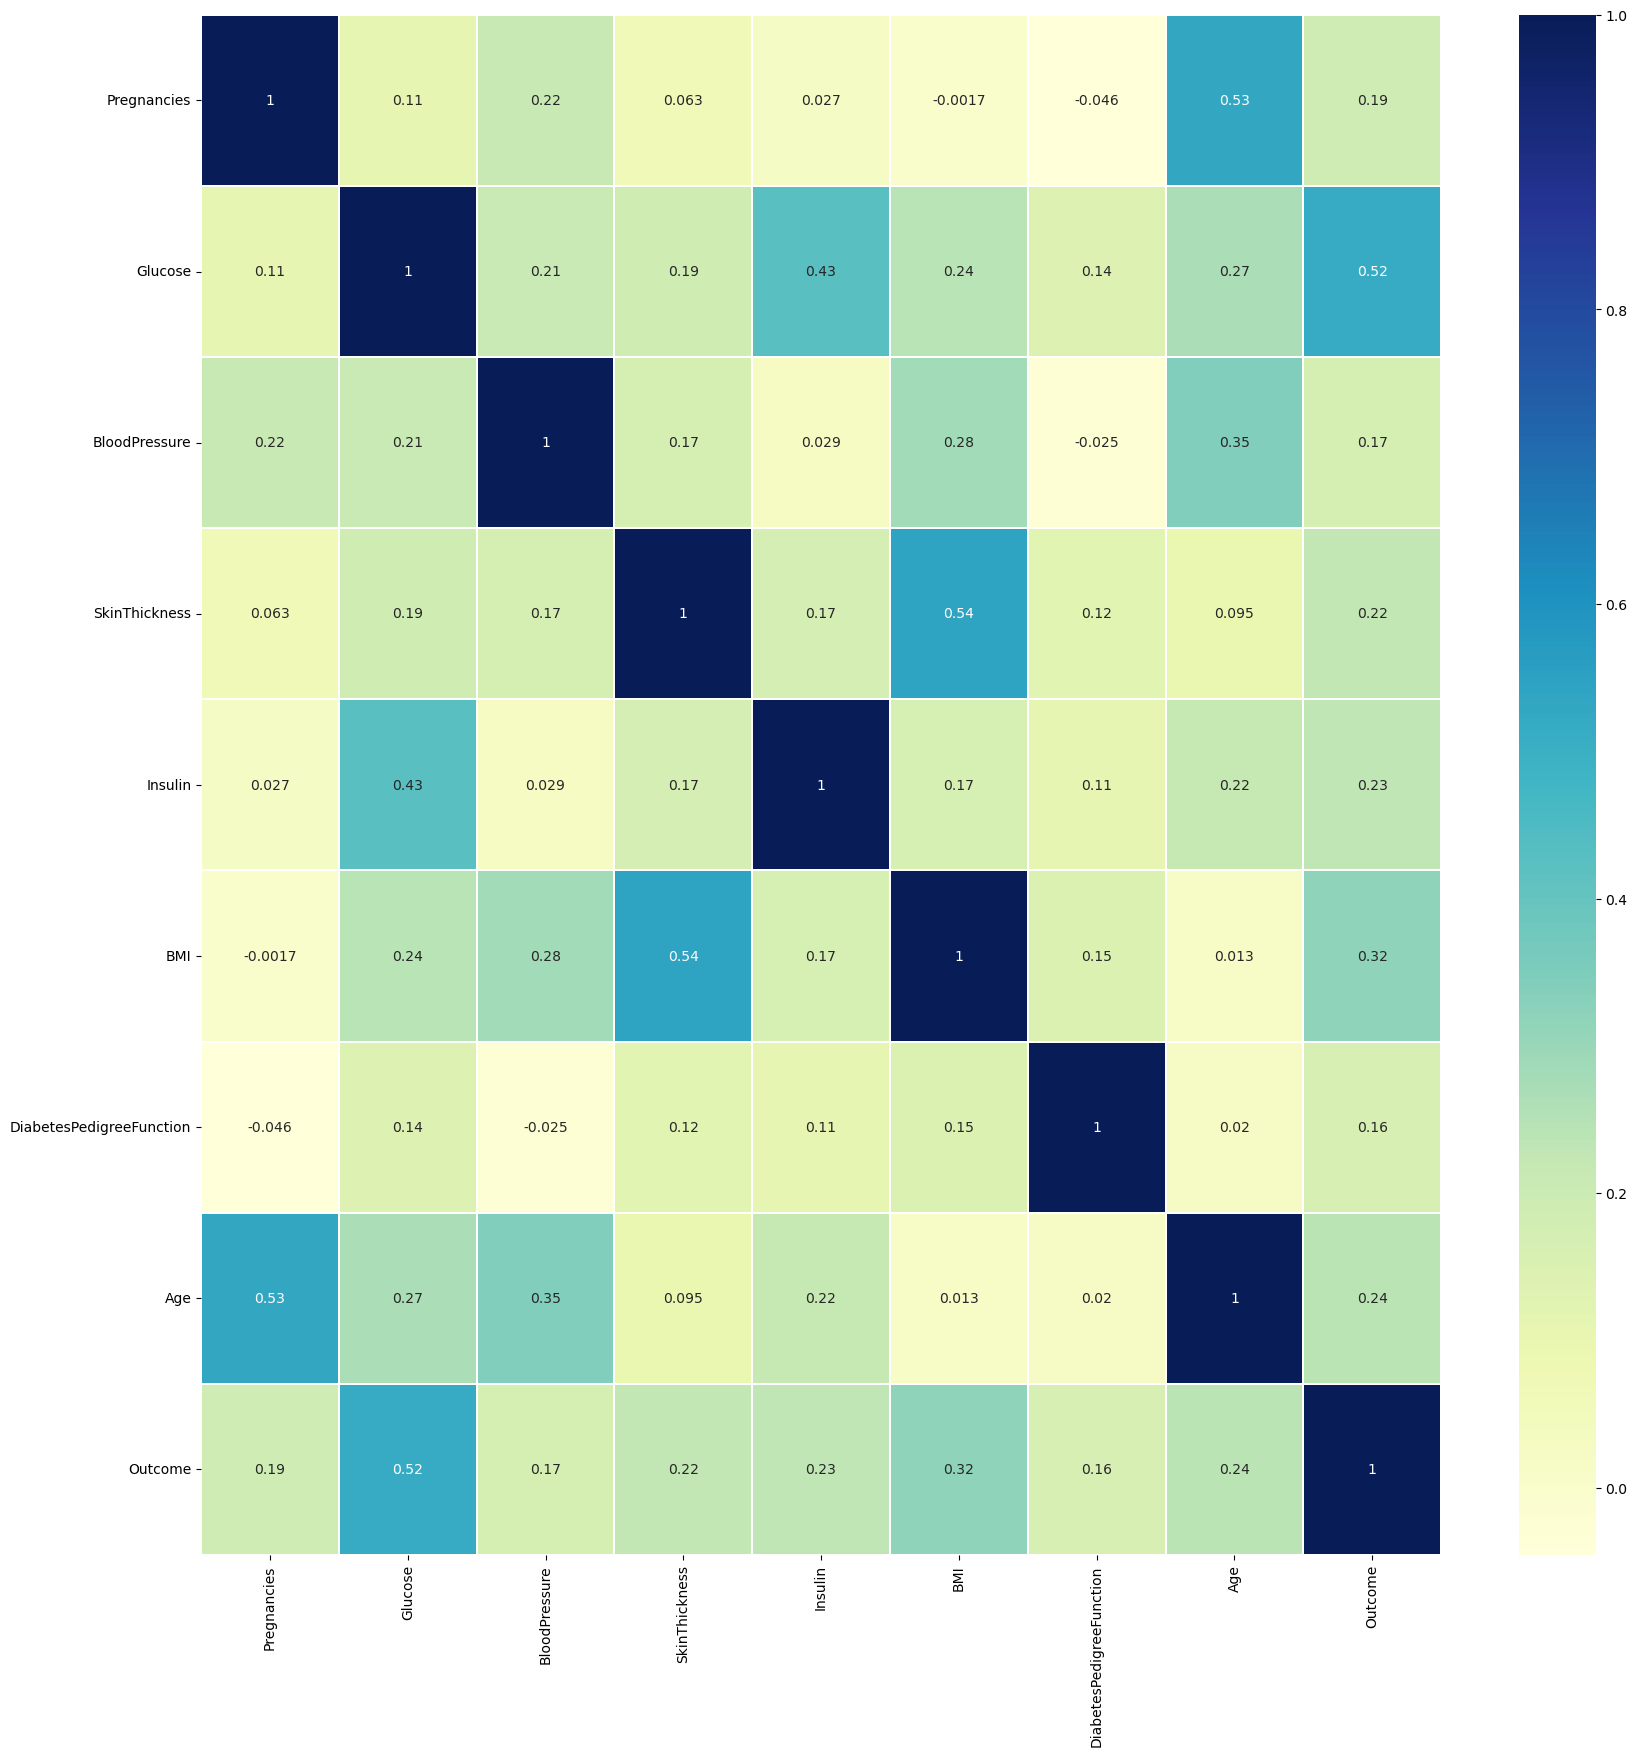

In [21]:
sns.heatmap(data_resampled.corr(),annot=True, cmap='YlGnBu', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [22]:
data_resampled.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

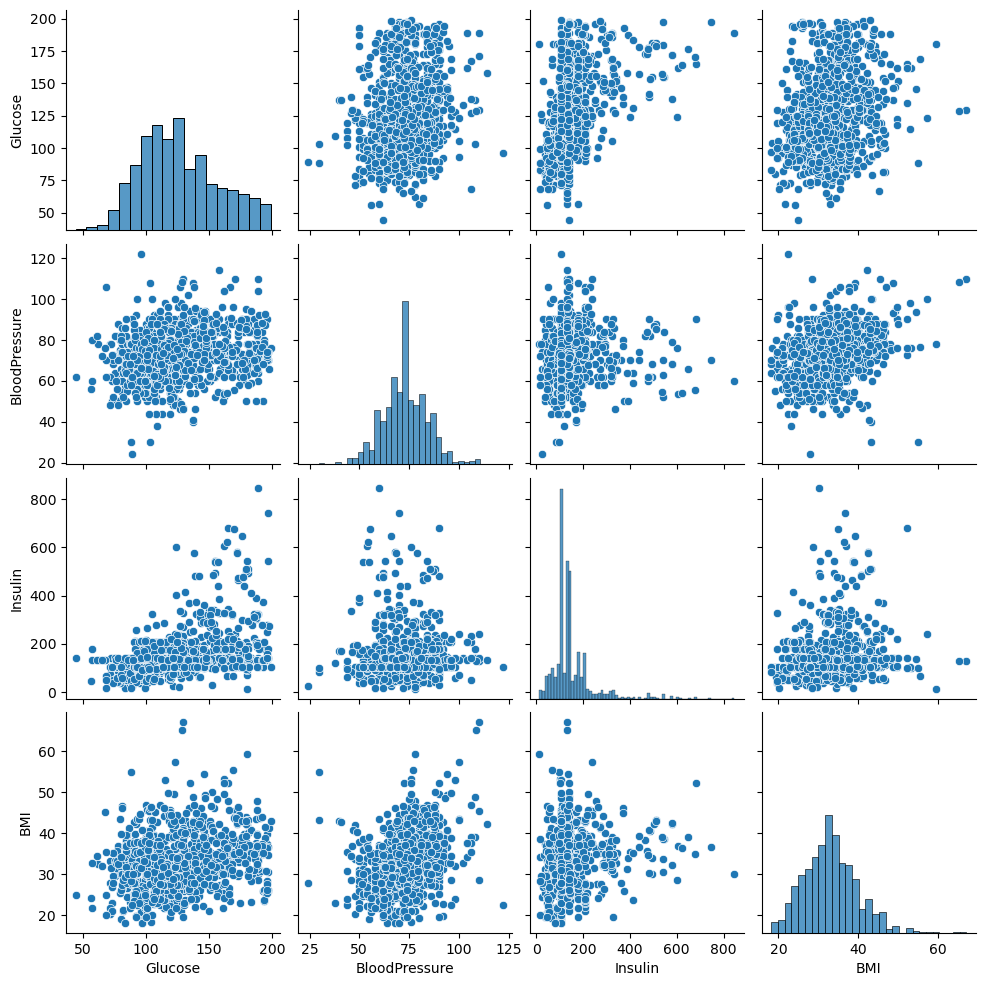

In [23]:
select_data=data_resampled.loc[:,['Glucose','BloodPressure','Insulin','BMI']]
sns.pairplot(select_data)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns = data_resampled.columns[:-1]
scaled_data = sc.fit_transform(data_resampled[columns])
diabetes_data_sc = pd.DataFrame(scaled_data, columns= columns)
diabetes_data_sc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.636169,0.674491,-0.076432,0.648324,-0.210513,0.081380,0.448508,1.402507
1,-0.897507,-1.336990,-0.589807,-0.076048,-0.115817,-0.959876,-0.403452,-0.253654
2,1.249639,1.791981,-0.760932,-0.057525,-0.115817,-1.450754,0.587414,-0.166488
3,-0.897507,-1.209277,-0.589807,-0.800419,-0.599819,-0.736750,-0.971425,-1.125318
4,-1.204242,0.323280,-2.814432,0.648324,0.178792,1.494513,5.575700,-0.079321


In [25]:
models = []
model_accuracy = []
model_f1_score = []
model_auc_score = []

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assigning the feature data to X
X = diabetes_data_sc

# Assigning the target variable to y
y = data_resampled['Outcome']

# Splitting the data into training and testing sets
# Splitting the data into training and testing sets using train_test_split function

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 100)
# Logistic regression
model_lr = LogisticRegression(random_state=100)  # Create a logistic regression model
model_lr.fit(X_train, y_train)  # Fit the model to the training data
y_pred = model_lr.predict(X_test)  # Predict the target variable for the test data
accuracy_lr = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print('Accuracy of Logistic Regression= %.3f' % accuracy_lr)

Accuracy of Logistic Regression= 0.750


In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score
parameters = {'C': np.logspace(0, 5, 50)}

In [29]:
gs_lr = GridSearchCV(model_lr, param_grid=parameters, cv=5, verbose=0)
gs_lr.fit(X_train, y_train)  

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=100),
             param_grid={'C': array([1.00000000e+00, 1.26485522e+00, 1.59985872e+00, 2.02358965e+00,
       2.55954792e+00, 3.23745754e+00, 4.09491506e+00, 5.17947468e+00,
       6.55128557e+00, 8.28642773e+00, 1.04811313e+01, 1.32571137e+01,
       1.67683294e+01, 2.12095089e+01, 2.68269580e+01, 3.39322177e+01,
       4.29193426e+01, 5.42867...
       2.81176870e+02, 3.55648031e+02, 4.49843267e+02, 5.68986603e+02,
       7.19685673e+02, 9.10298178e+02, 1.15139540e+03, 1.45634848e+03,
       1.84206997e+03, 2.32995181e+03, 2.94705170e+03, 3.72759372e+03,
       4.71486636e+03, 5.96362332e+03, 7.54312006e+03, 9.54095476e+03,
       1.20679264e+04, 1.52641797e+04, 1.93069773e+04, 2.44205309e+04,
       3.08884360e+04, 3.90693994e+04, 4.94171336e+04, 6.25055193e+04,
       7.90604321e+04, 1.00000000e+05])})

In [30]:
lr_best_param = gs_lr.best_params_  # Get the best parameters found by grid search
lr_best_param

{'C': 1.0}

In [31]:
model_lr_1 = LogisticRegression(C=2.02, random_state=100)  # Create a logistic regression model with best parameters
model_lr_1.fit(X_train, y_train)  # Fit the model to the training data with best parameters
y_pred_lr = model_lr_1.predict(X_test)  # Predict the target variable for the test data using the updated model
accuracy_lr = accuracy_score(y_test, y_pred_lr)  # Calculate the accuracy of the updated model
print('Accuracy of Logistic Regression= %.3f' % accuracy_lr)

Accuracy of Logistic Regression= 0.753


In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

probs = model_lr.predict_proba(X_test)  # Get predicted probabilities for the test data
probs = probs[:, 1]  # Extract probabilities of the positive class
auc_lr = roc_auc_score(y_test, probs)  # Calculate the AUC-ROC score
print('AUC:', auc_lr)

AUC: 0.8448712818460717


Text(0.5, 1.0, 'ROC curve - Logistic Regression')

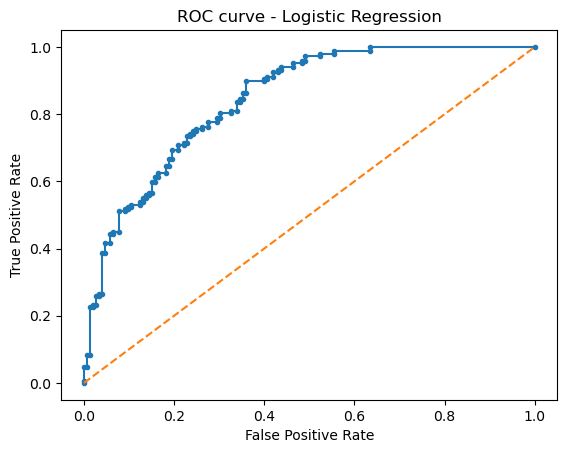

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate ROC curve metrics
plt.plot(fpr, tpr, marker='.')  # Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot diagonal line
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('ROC curve - Logistic Regression') 

In [34]:
models.append('LR')
model_accuracy.append(accuracy_lr)
model_auc_score.append(auc_lr)

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=100)
# Define the parameters for grid search
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, None]
}
# Create a GridSearchCV object with DecisionTreeClassifier and parameters
gs_dt = GridSearchCV(model_dt, param_grid=parameters, cv=5, verbose=0)

gs_dt.fit(X_train, y_train)  # Fit the GridSearchCV object to the training data

gs_dt.best_params_ 

{'max_depth': 4}

In [36]:
gs_dt.best_score_

0.7557142857142857

In [37]:
model_dt = DecisionTreeClassifier(max_depth = 3)
model_dt.fit(X_train, y_train)
accuracy_dt = model_dt.score(X_test, y_test)
print('Accuracy of Decision Tree= %.3f' %accuracy_dt)

Accuracy of Decision Tree= 0.730


In [38]:
model_dt.feature_importances_

array([0.        , 0.59590773, 0.        , 0.0264173 , 0.        ,
       0.21749881, 0.        , 0.16017616])

Text(0.5, 1.0, 'Feature Importance in Model')

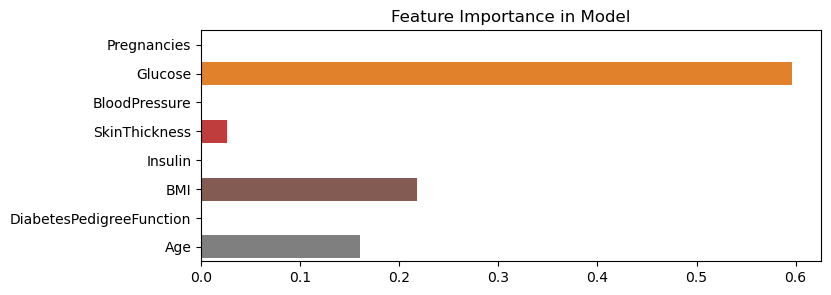

In [39]:
plt.figure(figsize=(8,3))  # Create a figure with a specific size
columns = X_train.columns  # Get the column names of X_train
sns.barplot(y=columns, x=model_dt.feature_importances_)  # Create a bar plot of feature importance
plt.title("Feature Importance in Model")

AUC: 0.8218843092792673


Text(0.5, 1.0, 'ROC curve - Decision Tree')

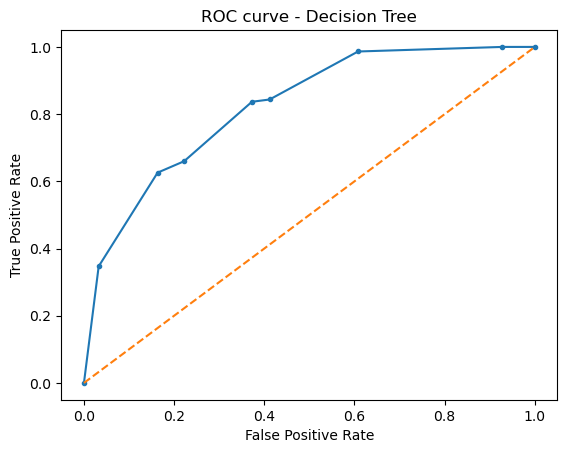

In [40]:
probs = model_dt.predict_proba(X_test)  # Get the predicted probabilities from the model
probs = probs[:,1]  # Extract the probabilities for the positive class
auc_dt = roc_auc_score(y_test, probs)  # Calculate the AUC score
print('AUC:', auc_dt)  # Print the AUC score

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate the ROC curve
plt.plot(fpr, tpr, marker='.')  # Plot the ROC curve
plt.plot([0,1], [0,1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')  # Set the x-axis label
plt.ylabel('True Positive Rate')  # Set the y-axis label
plt.title('ROC curve - Decision Tree')

In [41]:
models.append('DT')  # Add the model name to the list of models
model_accuracy.append(accuracy_dt)  # Add the model accuracy to the list of accuracies
model_auc_score.append(auc_dt)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)  # Create a Random Forest classifier
parameters = {
    'n_estimators' : [10,50,100,150],  # Define the number of trees in the forest
    'max_depth' : [None,1,3,5,7,9],  # Define the maximum depth of the tree
    'min_samples_leaf' : [1,3,5,7,9],  # Define the minimum number of samples required to be at a leaf node
    'min_samples_split': [1,2,3,4,5]  # Define the minimum number of samples required to split an internal node
}

In [43]:
gs_rf = GridSearchCV(estimator=rf,param_grid=parameters,cv=5,verbose=0)  # Perform grid search to find the best hyperparameters
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [None, 1, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150]})

In [72]:
print(gs_rf.best_score_)  # Print the best score achieved during grid search
gs_rf.best_params_ 

0.8085714285714285


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [45]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=5,random_state=100)  # Create a Random Forest classifier with specific hyperparameters
model_rf.fit(X_train, y_train)  # Fit the model with training data
accuracy_rf = model_rf.score(X_test, y_test)  # Calculate the accuracy of the model on test data
print('Accuracy of Random Forest= %.3f' %accuracy_rf) 

Accuracy of Random Forest= 0.817


Text(0.5, 1.0, 'Feature Importance in Model')

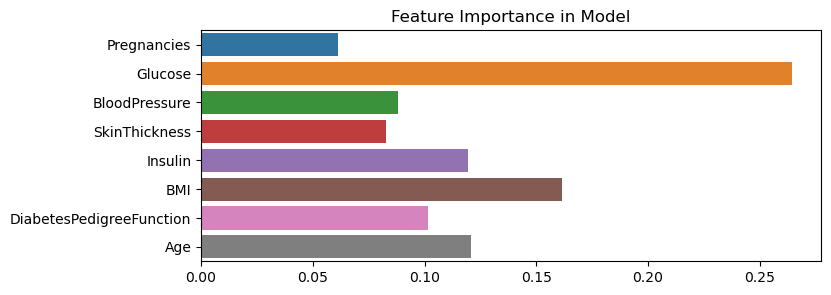

In [46]:
plt.figure(figsize=(8,3))
sns.barplot(y=columns, x=model_rf.feature_importances_)  # Plot the feature importance in the model
plt.title("Feature Importance in Model")

AUC: 0.8983148815081587


Text(0.5, 1.0, 'ROC curve - Random Forest')

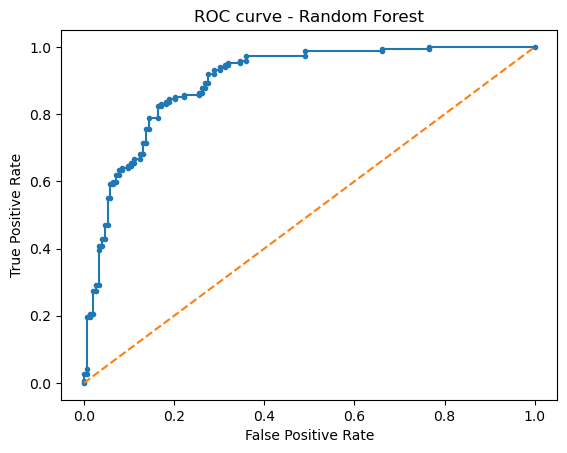

In [47]:
probs = model_rf.predict_proba(X_test)  # Get predicted probabilities from the model
probs = probs [:,1]  # Extract the probabilities for the positive class
auc_rf = roc_auc_score(y_test, probs)  # Calculate the AUC score
print('AUC:', auc_rf)  # Print the AUC score

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate the ROC curve
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Random Forest')

In [48]:
models.append('RF')  # Add the model name to a list of models
model_accuracy.append(accuracy_rf)  # Add the model accuracy to a list
model_auc_score.append(auc_rf) 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()  # Create KNN classifier
knn_neighbors = [i for i in range(2,20)]  # List of neighbors to test
parameters = {
    'n_neighbors': knn_neighbors   
}

In [50]:
gs_knn = GridSearchCV(estimator=model_knn,param_grid=parameters,cv=5,verbose=0)  # Perform grid search for best parameters
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [51]:
gs_knn.best_params_

{'n_neighbors': 16}

In [52]:
gs_knn.best_score_

0.7685714285714286

In [53]:
model_knn = KNeighborsClassifier(n_neighbors=3, p=2)  # Create KNN model with specified parameters
model_knn.fit(X_train,y_train)  # Fit the model with training data
model_knn.score(X_train,y_train) 

0.8757142857142857

In [54]:
accuracy_knn = model_knn.score(X_test, y_test)  # Calculate the accuracy score on test data
print('Accuracy of KNN= %.3f' %accuracy_knn)

Accuracy of KNN= 0.760


In [55]:
pred_y_knn = model_knn.predict(X_test)  # Make predictions on test data
accuracy_score(y_test,pred_y_knn)  

0.76

AUC: 0.8293984260370815


array([0.75285714, 0.76714286, 0.75      , 0.75142857, 0.75      ,
       0.74      , 0.74142857, 0.76142857, 0.76      , 0.76142857,
       0.76      , 0.76428571, 0.75571429, 0.76285714, 0.76857143,
       0.76      , 0.76      , 0.75      ])

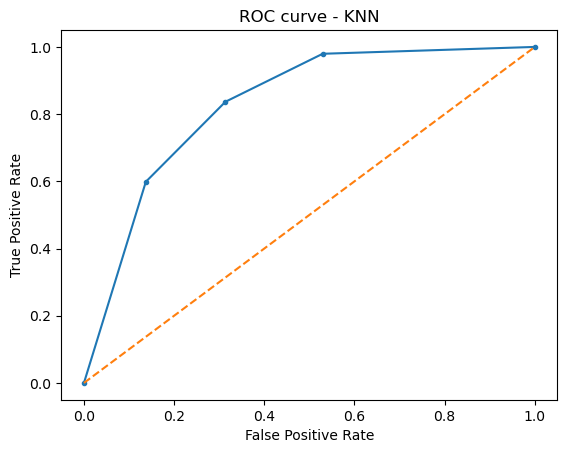

In [56]:
probs = model_knn.predict_proba(X_test)  # Get class probabilities for test data
probs = probs [:,1]  # Extract probabilities for positive class
auc_knn = roc_auc_score(y_test, probs)  # Calculate AUC score
print('AUC:', auc_knn)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate ROC curve
plt.plot(fpr,tpr,marker='.')  # Plot ROC curve
plt.plot([0,1],[0,1],linestyle='--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - KNN');
models.append('KNN')  # Add model name to list
model_accuracy.append(accuracy_knn)  # Add model accuracy to list
model_auc_score.append(auc_knn)  # Add model AUC score to list
gs_knn.cv_results_['mean_test_score']

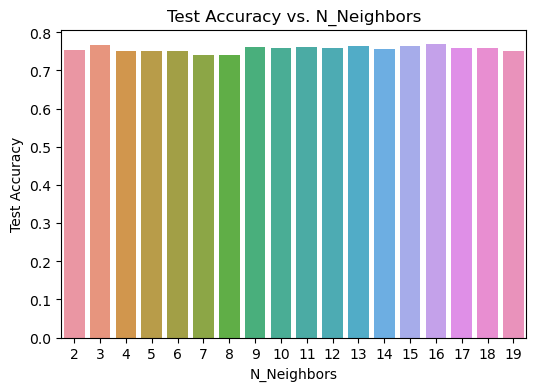

In [57]:
plt.figure(figsize=(6,4))
sns.barplot(x=knn_neighbors, y=gs_knn.cv_results_['mean_test_score'])  # Plot bar chart of test accuracy vs. number of neighbors
plt.xlabel("N_Neighbors")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. N_Neighbors");

In [58]:
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', random_state=100, verbose=0)  # Create an SVM model with RBF kernel
parameters = {
    'C': [1, 5, 10, 15, 20, 25]  # Define a grid of C values for hyperparameter tuning
}
gs_svm = GridSearchCV(estimator=model_svm, param_grid=parameters, cv=5, verbose=5)  # Perform grid search with cross-validation
gs_svm.fit(X, y)  # Fit the model to the training data
gs_svm.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...............................C=1;, score=0.770 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.755 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.820 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.830 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.805 total time=   0.0s
[CV 1/5] END ...............................C=5;, score=0.780 total time=   0.0s
[CV 2/5] END ...............................C=5;, score=0.730 total time=   0.0s
[CV 3/5] END ...............................C=5;, score=0.810 total time=   0.0s
[CV 4/5] END ...............................C=5;, score=0.855 total time=   0.0s
[CV 5/5] END ...............................C=5;, score=0.830 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.765 total time=   0.0s
[CV 2/5] END ..............................C=10;,

0.8009999999999999

In [59]:
gs_svm.best_params_
gs_svm.best_estimator_
model_svm_1 = SVC(probability=True, C=5, kernel='rbf', random_state=100, verbose=0)  # Create a new SVM model with optimized hyperparameters
model_svm_1.fit(X_train,y_train)
model_svm_1.score(X_train,y_train)

0.8885714285714286

In [60]:
accuracy_svm = model_svm_1.score(X_test, y_test)  # Calculate the accuracy of the SVM model
print('Accuracy of SVM = %.3f' % accuracy_svm)

Accuracy of SVM = 0.760


AUC: 0.858


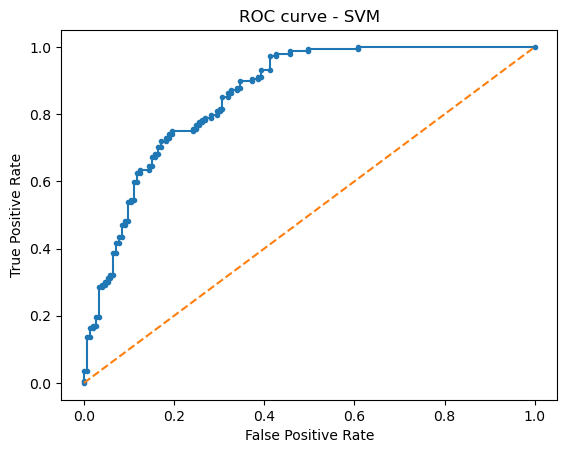

In [61]:
probs = model_svm_1.predict_proba(X_test)  # Get the predicted probabilities from the SVM model
probs = probs[:, 1]  # Select the probabilities for the positive class
auc_svm = roc_auc_score(y_test, probs)  # Calculate the AUC score
print('AUC: %.3f' % auc_svm)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate the ROC curve values
plt.plot(fpr, tpr, marker='.')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - SVM');

In [63]:
models.append('KNN')
model_accuracy.append(accuracy_svm)
model_auc_score.append(auc_svm)
print(accuracy_svm, '%.3f' % auc_svm)

0.76 0.858


0.7333333333333333
AUC: 0.827


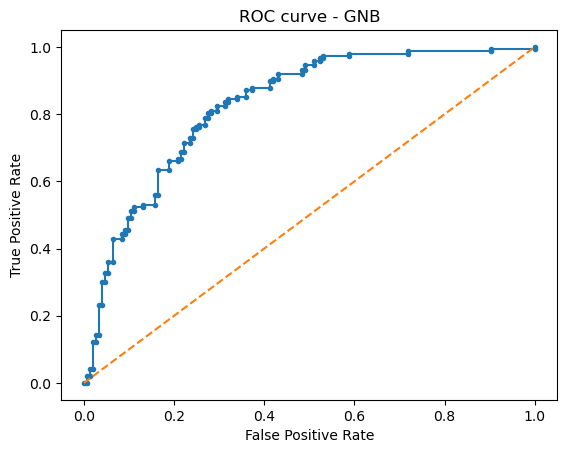

In [65]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()  # Create Gaussian Naive Bayes model
model_gnb.fit(X_train, y_train)  # Train the model
accuracy_gnb = model_gnb.score(X_test, y_test)  # Calculate accuracy score
print(accuracy_gnb)
probs = model_gnb.predict_proba(X_test)  # Get predicted probabilities
probs = probs[:, 1]  # Select probabilities for positive class
auc_gnb = roc_auc_score(y_test, probs)  # Calculate AUC score
print('AUC: %.3f' % auc_gnb)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # Calculate ROC curve
plt.plot(fpr, tpr, marker='.')  # Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')  # Add diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - GNB');

In [66]:
models.append('GNB')  # Add model name to list
model_accuracy.append(accuracy_gnb)  # Add accuracy score to list
model_auc_score.append(auc_gnb)  # Add AUC score to list
print(accuracy_gnb, '%.3f' % auc_gnb)  

0.7333333333333333 0.827


In [71]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_auc_score),columns= ['Model','Accuracy','AUC'])
model_summary = model_summary.set_index('Model')

# Displaying the model summary table
model_summary

,Accuracy,AUC
Model,,
LR,0.753333,0.844871
DT,0.730000,0.821884
RF,0.816667,0.898315
KNN,0.760000,0.829398
KNN,0.760000,0.857988
GNB,0.733333,0.827398


In [67]:
best_model = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=5,random_state=100)
# Fitting the best model on the training data
best_model.fit(X_train,y_train)

# Predicting the target variable using the best model on the test data
y_predict_rf = best_model.predict(X_test)

# Generating the classification report
report_RF = classification_report(y_test, y_predict_rf)
print(report_RF)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       153
           1       0.79      0.86      0.82       147

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [68]:
CF_matrix = confusion_matrix(y_test,y_predict_rf)
print('Confusion Matrix:\n',CF_matrix)

Confusion Matrix:
 [[119  34]
 [ 21 126]]


<AxesSubplot:>

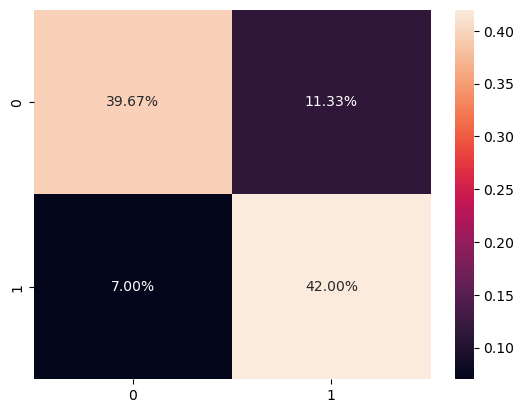

In [69]:
sns.heatmap(CF_matrix/np.sum(CF_matrix),annot=True,fmt='.2%')

In [70]:
model_score = best_model.score(X_test, y_test)
print ('Accuracy of Random Forest: %.3f' % model_score)

Accuracy of Random Forest: 0.817
